# Initialization

In [43]:
%reload_ext autoreload
%autoreload 2

import os, sys
from importlib import reload

import numpy as np
import scipy as sp
import scipy.stats
import corner
from nose import tools

import matplotlib as mpl
import matplotlib.pyplot as plt

import kdes

## Normalization

<class 'kdes.kernels.Triweight'>
	0.50 : 1.0000e+00
	1.00 : 1.0000e+00
	2.00 : 1.0000e+00
	4.00 : 1.0000e+00
<class 'kdes.kernels.Gaussian'>
	0.50 : 1.0000e+00
	1.00 : 1.0000e+00
	2.00 : 1.0000e+00
	4.00 : 1.0000e+00
<class 'kdes.kernels.Box'>
	0.50 : 1.0003e+00
	1.00 : 9.9366e-01
	2.00 : 9.9700e-01
	4.00 : 9.9867e-01
<class 'kdes.kernels.Parabola'>
	0.50 : 1.0001e+00
	1.00 : 9.9996e-01
	2.00 : 9.9999e-01
	4.00 : 1.0000e+00


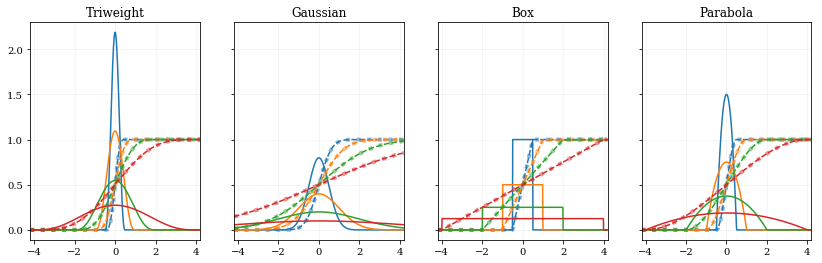

In [140]:
kernels = kdes.kernels._get_all_kernels()
num = len(kernels)

fig, axes = plt.subplots(figsize=[14, 4], ncols=num, sharey=True, sharex=True)
for ax in axes:
    ax.grid(alpha=0.15)

xe = np.linspace(-20.0, 20.0, 3000)
xc = kdes.utils.midpoints(xe, 'lin')
dx = np.diff(xe)
ax.set_xlim([-4.2, 4.2])

for ax, kern in zip(axes, kernels):
    print(kern)
    ax.set_title(kern.__name__)
    for bw in [0.5, 1.0, 2.0, 4.0]:
        pdf = kern.evaluate(xc, 0.0, bw=bw)
        tot = np.sum(pdf * dx)
        print("\t{:.2f} : {:.4e}".format(bw, tot))
        l1, = ax.plot(xc, pdf)
        ax.plot(xc, np.cumsum(pdf*dx), ls='--', color=l1.get_color())
        ax.plot(xc, kern.cdf(xc, bw=bw), ls=':', color=l1.get_color(), lw=4.0, alpha=0.5)
        tools.assert_almost_equal(tot, 1.0, delta=1e-2)
    
plt.show()

# Particular Kernels

## Epanechnikov (Parabola)

### Show that the median method is the same as CDF inversion 

In [ ]:
def draw_invert(size):
    xe, xc, dx = kdes.utils.bins(-1.0, 1.0, 1000)
    yy = kdes.kernels.Parabola.evaluate(xc)
    cs = np.cumsum(yy*dx)
    
    xc = np.concatenate([[-1.0], xc, [1.0]])
    cs = np.concatenate([[0.0], cs, [1.0]])
    
    xx = sp.interpolate.interp1d(cs, xc, kind='cubic')(np.random.uniform(0.0, 1.0, size))
    return xx

def draw_median(size):
    xx = np.random.uniform(-1, 1, 3*size).reshape(3, size)
    xx = np.median(xx, axis=0)
    return xx
    

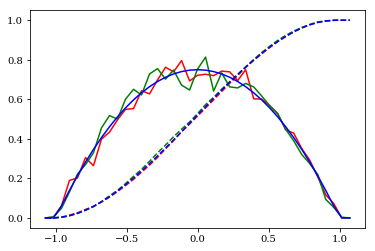

In [121]:
NUM = int(1e4)

aa = draw_median(NUM)
edges, cents, wids = kdes.utils.bins(-1.1, 1.1, 40)

hist, _ = np.histogram(aa, edges, density=True)
cum_hist = np.cumsum(hist*wids)
pdf = kdes.kernels.Parabola.evaluate(cents)
cum_pdf = np.cumsum(pdf*wids)

test = draw(NUM)
hist_test, _ = np.histogram(test, edges, density=True)
cum_test = np.cumsum(hist_test*wids)

plt.plot(cents, hist, 'r-')
plt.plot(cents, cum_hist, 'r--')

plt.plot(cents, hist_test, 'g-')
plt.plot(cents, cum_test, 'g--')

plt.plot(cents, pdf, 'b-')
plt.plot(cents, cum_pdf, 'b--')